In [12]:
import pandas as pd
import sqlite3
import numpy as np

In [13]:
con = sqlite3.connect('../data/propriedades.db')
df = pd.read_sql('select * from dados', con)

In [14]:
cruz = pd.read_csv('data/cruzain_id_chemb.csv', sep=';')

In [15]:
df = df.drop(['cx_most_apka','cx_most_bpka','cx_logp','cx_logd'], axis=1)

In [16]:
df = df.drop(df.index[df.molecular_species.isnull()])

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [19]:
df.query("canonical_smiles == 'c1c[nH]c(CN2CCc3ccccc3C2)c1'")

,chembl_id,mw_freebase,alogp,psa,rtb,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
199551,CHEMBL4095194,212.30,2.57,19.03,2.00,NEUTRAL,212.30,3.00,16.00,0.81,212.13,1.00,1.00,0.00,c1c[nH]c(CN2CCc3ccccc3C2)c1


In [8]:
df.describe()

,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
count,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00,2013428.00
mean,409.39,3.44,83.74,5.81,409.39,3.52,28.73,0.54,405.14,5.33,1.64,0.43
std,126.63,1.97,44.63,3.79,126.63,1.41,8.97,0.22,124.77,2.43,1.57,0.73
min,16.03,-61.65,0.00,0.00,16.03,0.00,1.00,0.00,17.03,0.00,0.00,0.00
25%,325.45,2.33,55.62,3.00,325.45,3.00,23.00,0.38,323.06,4.00,1.00,0.00
50%,393.45,3.46,76.46,5.00,393.45,3.00,28.00,0.56,389.24,5.00,1.00,0.00
75%,471.39,4.60,101.57,7.00,471.39,4.00,33.00,0.73,467.07,7.00,2.00,1.00
max,3061.60,26.15,1094.28,67.00,3061.60,68.00,200.00,0.95,999.41,52.00,36.00,4.00


In [28]:
target = df.query("canonical_smiles == 'c1c[nH]c(CN2CCc3ccccc3C2)c1'").to_dict('record')

In [30]:
target = target[0]

In [33]:
target

{'chembl_id': 'CHEMBL4095194',
 'mw_freebase': 212.296,
 'alogp': 2.573,
 'psa': 19.03,
 'rtb': 2.0,
 'molecular_species': 'NEUTRAL',
 'full_mwt': 212.3,
 'aromatic_rings': 3.0,
 'heavy_atoms': 16.0,
 'qed_weighted': 0.81,
 'mw_monoisotopic': 212.1313,
 'hba_lipinski': 1.0,
 'hbd_lipinski': 1.0,
 'num_lipinski_ro5_violations': 0.0,
 'canonical_smiles': 'c1c[nH]c(CN2CCc3ccccc3C2)c1'}

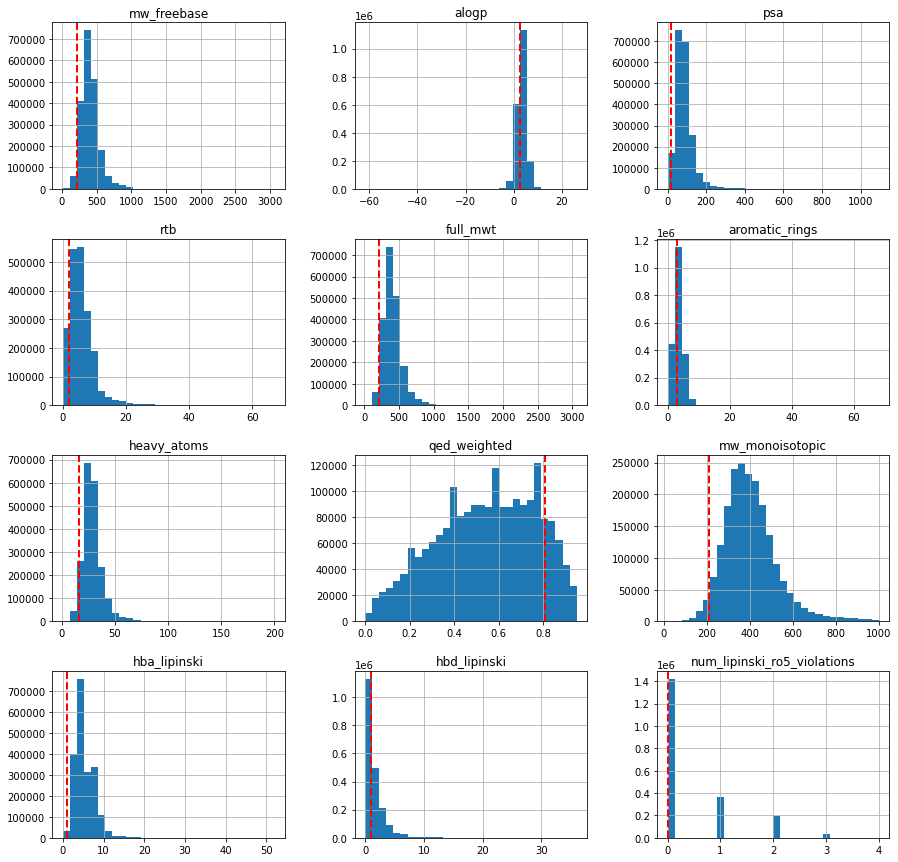

In [35]:
axes = df.hist(bins=30,figsize=(15,15))
for i, ax in enumerate(axes.flatten()):
    title = ax.title.__dict__["_text"]
    if title:
        ax.axvline(x=target[title], color='r', linestyle='dashed', linewidth=2)

In [ ]:
dir(df)

In [15]:
prep_clust = pd.get_dummies(df.query("num_lipinski_ro5_violations == 0"), columns=["molecular_species"])
prep_clust

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
0,CHEMBL287510,357.45,1.51,73.83,10.00,357.45,2.00,26.00,0.56,357.21,5.00,3.00,0.00,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1,0,1,0,0
1,CHEMBL285301,320.43,1.71,70.59,9.00,320.43,2.00,23.00,0.61,320.21,4.00,3.00,0.00,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1,0,1,0,0
2,CHEMBL285413,255.31,1.41,48.95,8.00,255.31,1.00,18.00,0.71,255.15,5.00,1.00,0.00,COc1ccc(OC)c(CNCC(OC)OC)c1,0,0,1,0
3,CHEMBL24475,262.35,3.65,46.53,8.00,262.35,1.00,19.00,0.57,262.16,3.00,1.00,0.00,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1,0,0,1,0
4,CHEMBL24545,330.47,4.45,43.37,2.00,330.47,4.00,24.00,0.70,330.22,3.00,0.00,0.00,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084581,CHEMBL4110105,383.46,1.35,91.79,7.00,383.46,4.00,28.00,0.66,383.21,9.00,1.00,0.00,Cc1cc(CNc2cc(OC[C@H]3C[C@@H]3c3ccn(C)n3)nn(C)c...,0,0,1,0
2084582,CHEMBL4110106,472.52,3.78,115.04,6.00,472.52,4.00,33.00,0.56,472.14,6.00,2.00,0.00,C[C@@H](NC(=O)c1ccc(-c2nc(C3CC3)cnc2N)cc1F)c1c...,0,0,1,0
2084584,CHEMBL4110108,337.33,3.03,76.68,2.00,337.34,5.00,25.00,0.78,337.11,5.00,1.00,0.00,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1,0,0,1,0
2084585,CHEMBL4110109,338.79,4.12,41.99,7.00,338.79,2.00,23.00,0.77,338.10,3.00,1.00,0.00,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F,0,0,1,0


In [16]:
prep_clust = prep_clust.drop(['chembl_id', "canonical_smiles"], axis=1)

In [17]:
df.query("chembl_id in @cruz['Molecule ChEMBL ID']").index

Int64Index([  23639,   24028,   26038,   82157,  100110,  135446,  135447,
             135448,  157726,  158647,
            ...
            1964108, 1964109, 1964110, 1964112, 1964113, 2003987, 2004376,
            2006386, 2062505, 2080458],
           dtype='int64', length=463)

In [18]:
prep_clust

,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
0,357.45,1.51,73.83,10.00,357.45,2.00,26.00,0.56,357.21,5.00,3.00,0.00,0,1,0,0
1,320.43,1.71,70.59,9.00,320.43,2.00,23.00,0.61,320.21,4.00,3.00,0.00,0,1,0,0
2,255.31,1.41,48.95,8.00,255.31,1.00,18.00,0.71,255.15,5.00,1.00,0.00,0,0,1,0
3,262.35,3.65,46.53,8.00,262.35,1.00,19.00,0.57,262.16,3.00,1.00,0.00,0,0,1,0
4,330.47,4.45,43.37,2.00,330.47,4.00,24.00,0.70,330.22,3.00,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084581,383.46,1.35,91.79,7.00,383.46,4.00,28.00,0.66,383.21,9.00,1.00,0.00,0,0,1,0
2084582,472.52,3.78,115.04,6.00,472.52,4.00,33.00,0.56,472.14,6.00,2.00,0.00,0,0,1,0
2084584,337.33,3.03,76.68,2.00,337.34,5.00,25.00,0.78,337.11,5.00,1.00,0.00,0,0,1,0
2084585,338.79,4.12,41.99,7.00,338.79,2.00,23.00,0.77,338.10,3.00,1.00,0.00,0,0,1,0


In [19]:
cruzain = df.query("chembl_id in @cruz['Molecule ChEMBL ID']")
cruzain

,chembl_id,mw_freebase,alogp,psa,rtb,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
23639,CHEMBL4074869,322.44,3.78,42.54,3.00,NEUTRAL,322.44,3.00,23.00,0.53,322.13,5.00,0.00,0.00,C/C(=N\N=c1/sc(C)c(-c2ccccc2)n1C)c1ccccn1
24028,CHEMBL4075493,400.51,4.93,51.77,5.00,NEUTRAL,400.51,4.00,29.00,0.35,400.14,6.00,0.00,0.00,COc1ccc(-c2cs/c(=N\N=C(/C)c3ccccn3)n2-c2ccccc2...
26038,CHEMBL4078580,309.84,2.40,40.29,6.00,BASE,309.84,3.00,21.00,0.81,273.18,3.00,2.00,0.00,Cl.c1ccc2[nH]c(CNCCCN3CCOCC3)cc2c1
82157,CHEMBL1630613,383.43,2.02,98.62,7.00,NEUTRAL,383.43,3.00,27.00,0.21,383.11,6.00,2.00,0.00,C=CCNC(=S)N/N=C\c1ccccc1OCc1ccc2no[n+]([O-])c2c1
100110,CHEMBL4105266,178.24,0.23,32.26,1.00,NEUTRAL,178.24,2.00,13.00,0.62,178.12,4.00,0.00,0.00,CN1CCN(c2ccncn2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003987,CHEMBL4074869,322.44,3.78,42.54,3.00,NEUTRAL,322.44,3.00,23.00,0.53,322.13,5.00,0.00,0.00,C/C(=N\N=c1/sc(C)c(-c2ccccc2)n1C)c1ccccn1
2004376,CHEMBL4075493,400.51,4.93,51.77,5.00,NEUTRAL,400.51,4.00,29.00,0.35,400.14,6.00,0.00,0.00,COc1ccc(-c2cs/c(=N\N=C(/C)c3ccccn3)n2-c2ccccc2...
2006386,CHEMBL4078580,309.84,2.40,40.29,6.00,BASE,309.84,3.00,21.00,0.81,273.18,3.00,2.00,0.00,Cl.c1ccc2[nH]c(CNCCCN3CCOCC3)cc2c1
2062505,CHEMBL1630613,383.43,2.02,98.62,7.00,NEUTRAL,383.43,3.00,27.00,0.21,383.11,6.00,2.00,0.00,C=CCNC(=S)N/N=C\c1ccccc1OCc1ccc2no[n+]([O-])c2c1


In [53]:
import sys
sys.path.append("../module/")
from calcula_tanimoto import *

In [56]:
cruzain_similaridade = []
jobs = cruzain.canonical_smiles.to_numpy().tolist()
for smile in jobs:
    cruzain_similaridade.append(calcula_tanimoto(smile, cruzain, 20))


In [20]:
clust_cru = pd.get_dummies(cruzain.drop(['chembl_id', "canonical_smiles"], axis=1), columns=["molecular_species"])
clust_cru

,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,molecular_species_ZWITTERION
23639,322.44,3.78,42.54,3.00,322.44,3.00,23.00,0.53,322.13,5.00,0.00,0.00,0,0,1,0
24028,400.51,4.93,51.77,5.00,400.51,4.00,29.00,0.35,400.14,6.00,0.00,0.00,0,0,1,0
26038,309.84,2.40,40.29,6.00,309.84,3.00,21.00,0.81,273.18,3.00,2.00,0.00,0,1,0,0
82157,383.43,2.02,98.62,7.00,383.43,3.00,27.00,0.21,383.11,6.00,2.00,0.00,0,0,1,0
100110,178.24,0.23,32.26,1.00,178.24,2.00,13.00,0.62,178.12,4.00,0.00,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003987,322.44,3.78,42.54,3.00,322.44,3.00,23.00,0.53,322.13,5.00,0.00,0.00,0,0,1,0
2004376,400.51,4.93,51.77,5.00,400.51,4.00,29.00,0.35,400.14,6.00,0.00,0.00,0,0,1,0
2006386,309.84,2.40,40.29,6.00,309.84,3.00,21.00,0.81,273.18,3.00,2.00,0.00,0,1,0,0
2062505,383.43,2.02,98.62,7.00,383.43,3.00,27.00,0.21,383.11,6.00,2.00,0.00,0,0,1,0


In [47]:
ab = preprocessing.normalize(clust_cru, norm='l1')
cluster_ab = KMeans(n_clusters=30, random_state=5)
grupos_ab = cluster_ab.fit(ab).labels_

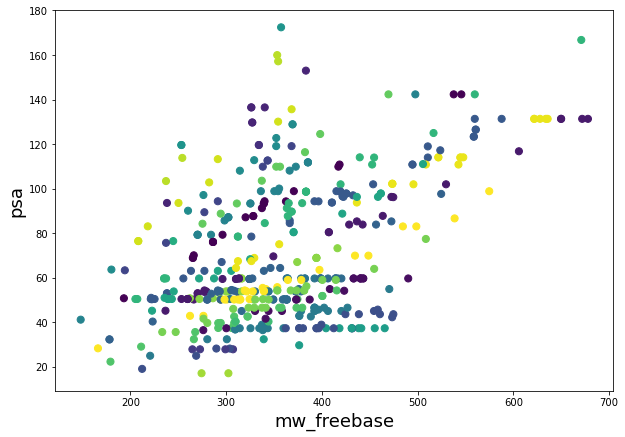

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(x=clust_cru.mw_freebase, y=clust_cru.psa, c=grupos_ab, s=50)
plt.xlabel('mw_freebase', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

In [22]:
x = preprocessing.normalize(prep_clust, norm='l1')
cluster = KMeans(n_clusters=30, random_state=29)
cluster.fit(x).labels_

array([ 0, 21,  0, ..., 21, 28,  0], dtype=int32)

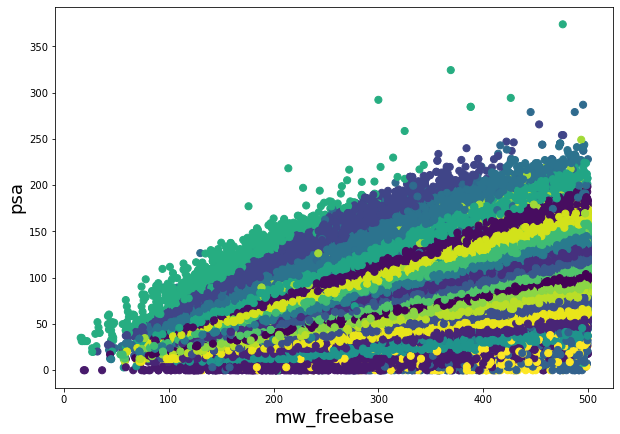

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust[['mw_freebase']], y=prep_clust.psa, c=cluster.fit(x).labels_, s=50)
plt.xlabel('mw_freebase', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

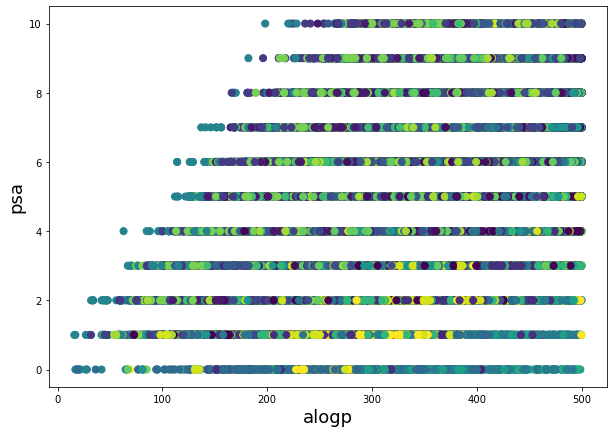

In [69]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust.mw_freebase, y=prep_clust.hba_lipinski, c=cluster.fit(x).labels_, s=50)
plt.xlabel('alogp', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

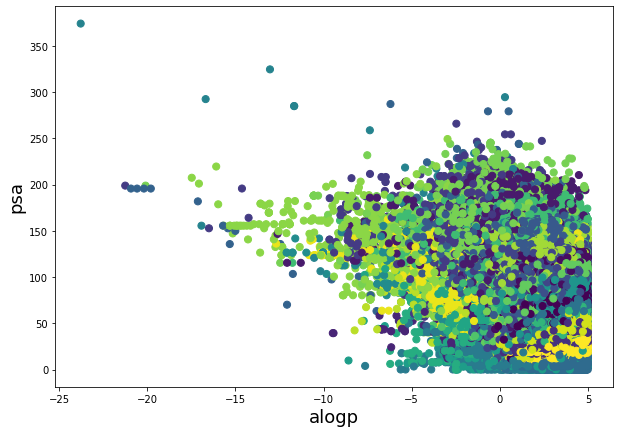

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(x=prep_clust.alogp, y=prep_clust.psa, c=cluster.fit(x).labels_, s=50)
plt.xlabel('alogp', fontsize=18)
plt.ylabel('psa', fontsize=18)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

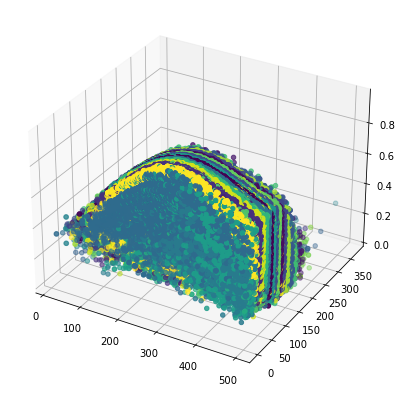

In [51]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(prep_clust.mw_freebase, prep_clust.psa, prep_clust.qed_weighted, c=cluster.fit(x).labels_);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

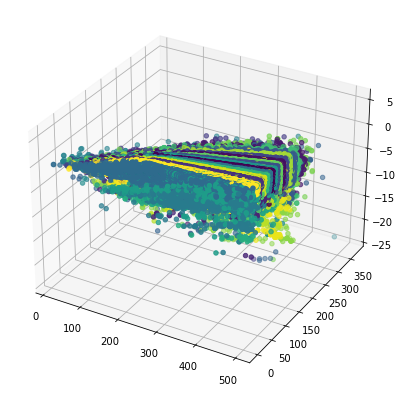

In [72]:
plt.figure(figsize=(10,7))
grp = plt.axes(projection='3d')
# Data for a three-dimensional line
#zline = np.linspace(0, 15, 1000)
#xline = np.sin(zline)
#yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
grp.scatter3D(prep_clust.mw_freebase, prep_clust.psa, prep_clust.alogp, c=cluster.fit(x).labels_);
plt.show

In [51]:
sns.pairplot(prep_clust[['mw_freebase', 'psa', 'grupos_cluster_knn']], hue='grupos_cluster_knn')


KeyError: "['grupos_cluster_knn'] not in index"

In [ ]:
tab_usada['grupos_cluster_knn'] = cluster.fit(x).labels_
tab_usada.drop(["num_ro5_violations", "ro3_pass", "num_lipinski_ro5_violations"], axis=1).sort_values(by='grupos_cluster_knn')